# Herramienta para la implementación de sistemas multiagentes
Carlos Moisés Chávez Jiménez A01637322
09/11/2021

## Descripción del código
Simulación de la limpieza de una habitación utilizando sistemas multiagentes

### Instalación de la librería agentpy

In [1]:
!pip install agentpy

     |████████████████████████████████| 52 kB 761 kB/s 
     |████████████████████████████████| 756 kB 25.6 MB/s 
     |████████████████████████████████| 10.3 MB 60.2 MB/s 
     |████████████████████████████████| 38.2 MB 26 kB/s 
     |████████████████████████████████| 81 kB 8.5 MB/s 
     |████████████████████████████████| 65 kB 3.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.8.2
    Uninstalling importlib-metadata-4.8.2:
      Successfully uninstalled importlib-metadata-4.8.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the

### Importamos las librerías a utilizar

In [1]:
# Model design
import agentpy as ap

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython

### Declaramos la clase contiene las funciones con las que trabajaremos
- La primer función declara los agentes, la cuadricula e inicializa la limpieza
- La segunda función se encarga de trabajar los espacios sucios
- La tercera documenta el final de la simulación

In [2]:
class Limpieza(ap.Model):

    # Creación de los agentes y de la habitación.
    def setup(self):
        n_tiles = int(self.p['densidad azulejos'] * (self.p.size**2))
        tiles = self.agents = ap.AgentList(self, n_tiles)
        self.room = ap.Grid(self, [self.p.size]*2, track_empty=True)
        self.room.add_agents(tiles, random=True, empty=True)
        self.agents.condition = 0
        unfortunate_tiles = self.room.agents[0:self.p.size, 0:2]
        unfortunate_tiles.condition = 1

    def step(self):
        # Se selecciona el azulejo a limpiar
        cleaned_tiles = self.agents.select(self.agents.condition == 1)
        for tile in cleaned_tiles:
            for neighbor in self.room.neighbors(tile):
                if neighbor.condition == 0:
                    neighbor.condition = 1
            tile.condition = 2 # se marca como azulejo limpio
        # Se detiene si ya no hay azulejos por limpiar
        if len(cleaned_tiles) == 0:
            self.stop()
    # Se documenta la limpieza
    def end(self):
        cleaned_tiles = len(self.agents.select(self.agents.condition == 2))
        self.report('porcentaje de azulejos limpios',
                    cleaned_tiles / len(self.agents))

### Definimos los parametros de la cuadricula y la cantidad de pasos

In [4]:
parameters = {
    'densidad azulejos': 0.7,
    'size': 50, # Tamaño de la habitación
    'steps': 100,
}

### Declaramos la función de animación
Aqui es donde armamos la animación de la limpieza y la desplegamos.

In [5]:
# Creamos la animación

def animation_plot(model, ax):
    attr_grid = model.room.attr_grid('condition')
    color_dict = {0:'#711D00', 1:'#00A5D8', 2:'#DCDCDC', None:'#D8C9BD'}
    ap.gridplot(attr_grid, ax=ax, color_dict=color_dict, convert=True)
    ax.set_title(f"Simulación de limpieza\n"
                 f"Pasos: {model.t}, Azulejos faltantes: "
                 f"{len(model.agents.select(model.agents.condition == 0))}")

fig, ax = plt.subplots()
model = Limpieza(parameters)
animation = ap.animate(model, fig, ax, animation_plot)
IPython.display.HTML(animation.to_jshtml(fps=15))

### Hacemos el experimento de tiempo con parametros definidos
Estos parametros son el tamaño de la cuadricula con el size y la densidad de arboles
Este experimento nos dirá el tiempo que tarda en limpiar toda la cuadricula.

In [7]:
#  Definimos nuevamente los parametros para experimentar con el tiempo
parameters = {
    'densidad azulejos': ap.Range(0.2, 0.6),
    'size': 100
}
sample = ap.Sample(parameters, n=30)
# Iniciamos simulación
exp = ap.Experiment(Limpieza, sample, iterations=40)
results = exp.run()

Scheduled runs: 1200
Completed: 1200, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:04:29.410101


### Graficamos la velocidad con la que se limpian todos los cuadros de la cuadricula

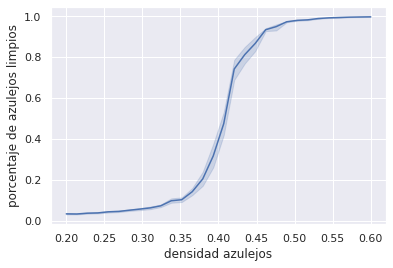

In [9]:
sns.set_theme()
sns.lineplot(
    data=results.arrange_reporters(),
    x='densidad azulejos',
    y='porcentaje de azulejos limpios'
);